In [2]:
!pip -q install networkx 
!pip -q install matplotlib

In [3]:
%matplotlib inline
import networkx as nx 
import random 
import matplotlib.pyplot as plt 

In [4]:
train_data = "/Users/zyang/Documents/VSCode/DeepSpin/train.data"
with open(train_data, 'r') as fin: 
    lines = fin.readlines()


G = nx.Graph()
for line in lines: 
    node1, node2, _ = line.split('\t')
    G.add_edge(node1, node2)

In [5]:
print("number of queries: ", 2*len(lines))
print("\nnumber of nodes: ", G.number_of_nodes())
print("\nnumber of edges: ", G.number_of_edges())
print("\nedges/nodes: ", 2*G.number_of_edges()/G.number_of_nodes())

number of queries:  108452836

number of nodes:  38247727

number of edges:  45139550

edges/nodes:  2.3603781735840146


In [6]:
# analyze graph 
components_list = list(nx.connected_components(G))
degree_lst = [d for n, d in G.degree()]
print("number of connected components" ,len(components_list))

print("\ntop 20 degrees: ", sorted(degree_lst)[-20:])

number of connected components 4484275

top 20 degrees:  [2224, 2257, 2307, 2423, 2531, 2565, 2671, 2687, 2693, 2695, 2697, 2698, 2748, 3038, 3047, 3060, 3156, 3486, 3486, 3615]


In [7]:
# sorted(degree_lst, key=lambda x: x[1])[-20:]
g_dict = {n:d for n, d in G.degree()}
nodes = {n: d for n, d in sorted(g_dict.items(), key=lambda item: item[1])[-20:]}
nodes


{'smart': 2224,
 'media': 2257,
 'drone': 2307,
 'com': 2423,
 'love': 2531,
 'solutions': 2565,
 'my': 2671,
 'a': 2687,
 'shop': 2693,
 'the': 2695,
 'cloud': 2697,
 'health': 2698,
 'marketing': 2748,
 'art': 3038,
 'home': 3047,
 'life': 3060,
 'travel': 3156,
 'design': 3486,
 'tech': 3486,
 'real_estate': 3615}

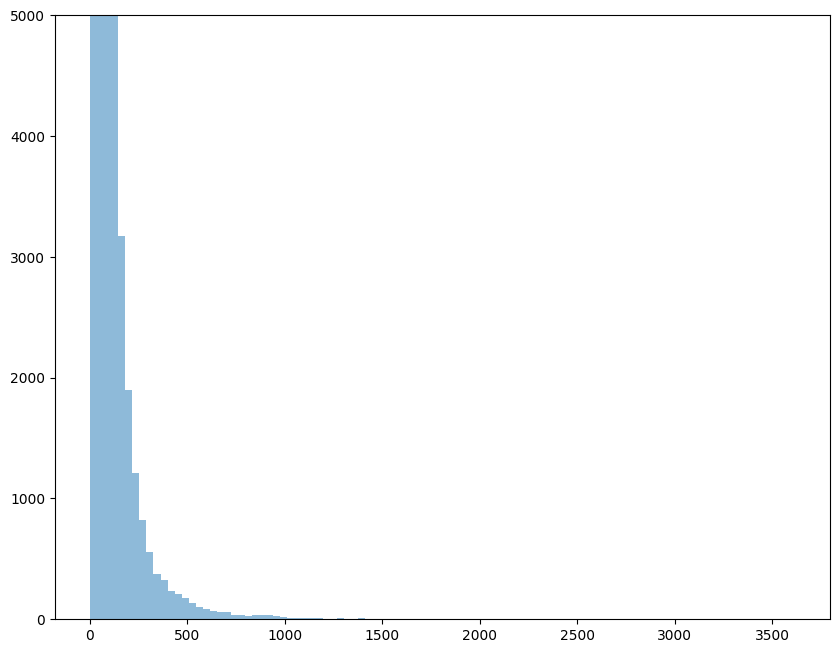

In [8]:
# a distribution of degrees 
fig, ax = plt.subplots(1, 1, figsize=(10,8), dpi=100)

ax.hist(degree_lst, alpha=0.5, bins=100)
# ax.set_xlim(0, 100)
ax.set_ylim(0, 5000)
plt.savefig("/Users/zyang/Documents/VSCode/DeepSpin/degree_dist_2.jpg")
# plt.show()

In [9]:
# get degree and neighbours

def get_random_query(): 
    random_index = random.randint(0, len(lines)-1)
    random_line = lines[random_index]
    return random_line.split('\t')[0]

# make_up mommy
rand_query = get_random_query()
print(f"{rand_query} has direct neighbours: ", list(G.adj[rand_query]))
print(f"\n{rand_query}'s degree: ", G.degree[rand_query])

the proper penguin llc has direct neighbours:  ['the proper penguin', 'tp penguin']

the proper penguin llc's degree:  2


In [10]:
# visualize a components 

def get_component(components, query): 
    for component in components: 
        if query in component: 
            return list(component) 
    raise Exception(f"{query} not in graph")


target_nodes = get_component(components_list, rand_query)
print("number of nodes in this component: ", len(target_nodes))
if len(target_nodes) < 10:
    nx.draw_shell(G.subgraph(target_nodes))


number of nodes in this component:  25748914


In [11]:
print(target_nodes[:10])

['marco rubio biography', 'the next level pro', 'natural beauty fine art', 'the 24 carat', 'media loud', 'si c or - trading', 'your name star', 'ebb and flow mom', 'coastal transcription', 's 3 supplements']


number of small components,  4434454

component nodes:  {'tourbillon de couleur', 'tourbillon de couleurs'}


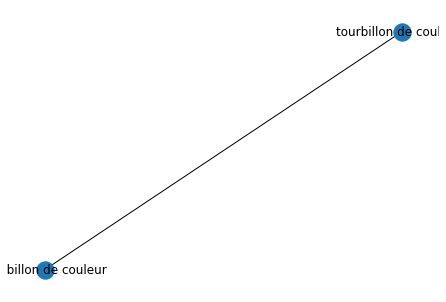

In [12]:
# visualize small components 

small_components = [component for component in components_list if len(component)<10]
print("number of small components, ", len(small_components))

rand_index = random.randint(0, len(small_components)-1)
target_component = small_components[rand_index]

print('\ncomponent nodes: ', target_component)
nx.draw_shell(G.subgraph(target_component), with_labels=True)
plt.show()

In [13]:
# directed graph, realty -> realty agent , 
# weight, some writing are more popular than others 
# update graph near real-time, trending query, 20qps
# build edge based on pseudo edge, substring